# Le déplacement à vélos dans la baie de San Francisco
## par Lamine Bellilet

## Investigation Overview

Dans cette analyse, je voulais identifier les caractéristiques des résidents de la baie de San Francisco dans leurs déplacements à vélos, en étudions le jeu de données du système Ford Gobike du mois de Février de l'année 2019. Je me suis particulièrement intéressé à l'âge des utilisateurs et sa relation avec la durée des trajets, l'activité selon les heures et jours de semaine mais aussi le sexe.

## Dataset Overview

Le jeu de données relève du système Ford Gobike et date de Février 2019. Il comporte 183412 trajets enregistrés, avec 16 données différents sur ces dernier dont la durée, les heures et stations de départ et d'arrêt, l'âge et le sexe des utilisateurs et leurs status vis-à-vis le système Gobike et Bike share for all.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('gobike_clean_modified.csv')
#print(df.info())
#df

## la durée moyenne des trajets et l'âge des utilisateurs

La majeure partie des utilisateurs sont ont environs 30 ans. Remarquablement toutefois, le déplacement à vélos est aussi fréquent, si ce n'est plus, chez les plus de 40 ans qu'il l'est chez les moins de 30 ans.
La durée moyenne est négativement corrélée àl'page, comme expecté, avec les plus agés faisant moins de trajets de 30-40 minutes.

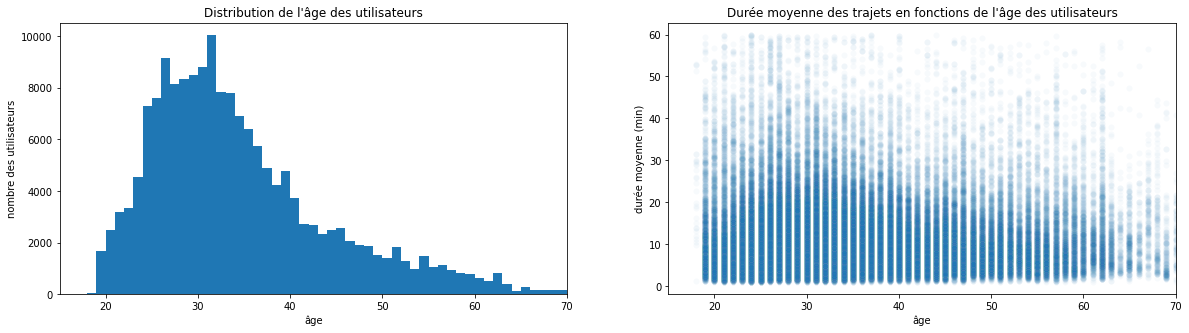

In [3]:
subdf = df.query('age<75 and duration_min<60')

monocolor = sb.color_palette()[0]
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
bins2 = np.arange(0, df.age.max()+1, 1)
plt.hist(data=df, x='age', bins=bins2)
plt.xlim((15,70))
plt.title("Distribution de l'âge des utilisateurs")
plt.xlabel('âge')
plt.ylabel('nombre des utilisateurs')

plt.subplot(1, 2, 2)
sb.scatterplot(data = subdf, x = 'age', y = 'duration_min', color=monocolor, alpha=1/30) #, truncate=False, x_jitter=0.3
plt.xlim((15,70))
plt.title("Durée moyenne des trajets en fonctions de l'âge des utilisateurs")
plt.xlabel('âge')
plt.ylabel('durée moyenne (min)');

## Nombre de trajets et leurs durées par jours de semaine

Les utilisateurs sollicitent le plus le système des vélos durant la semaine contrairement aux weekend. Mais, il est à noter, que les trajets des weekends sont en moyenne légèrement plus longs que les trajets durant la semaine.

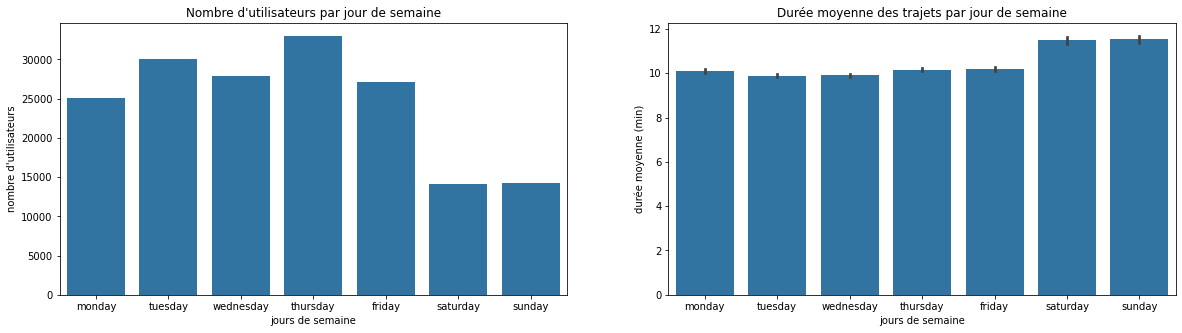

In [4]:
subdf2 = df.query('duration_min < 60')
week_days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
ax1 = sb.countplot(data=df, x='week_day', order=week_days, color=monocolor)
#ax1.bar_label(ax1.containers[0])
plt.title("Nombre d'utilisateurs par jour de semaine")
plt.ylabel("nombre d'utilisateurs")
plt.xlabel('jours de semaine')


plt.subplot(1, 2, 2)
ax2 = sb.barplot(data = subdf2, x = 'week_day', y = 'duration_min', order=week_days, color=monocolor)
#ax2.bar_label(ax2.containers[0])
plt.title("Durée moyenne des trajets par jour de semaine")
plt.ylabel("durée moyenne (min)")
plt.xlabel('jours de semaine');


## Durée moyenne des trajets à chaque heure de chaque jour de semaine

Le nombre de trajets augmente autour des heures de pointes (8h et 18h) durant la semaine, avec des durées allant jusqu'à 30 min à ces heures. Durant le reste de la journée y a moins de déplacements, presque de moitié, avec des durée moins longues.
Durant les weekends cependant, les trajets sont concentrés autour de 14h-15h avec des durées moyennes de 20 minutes et peu, voire très peu de trajets en dehors de ça.


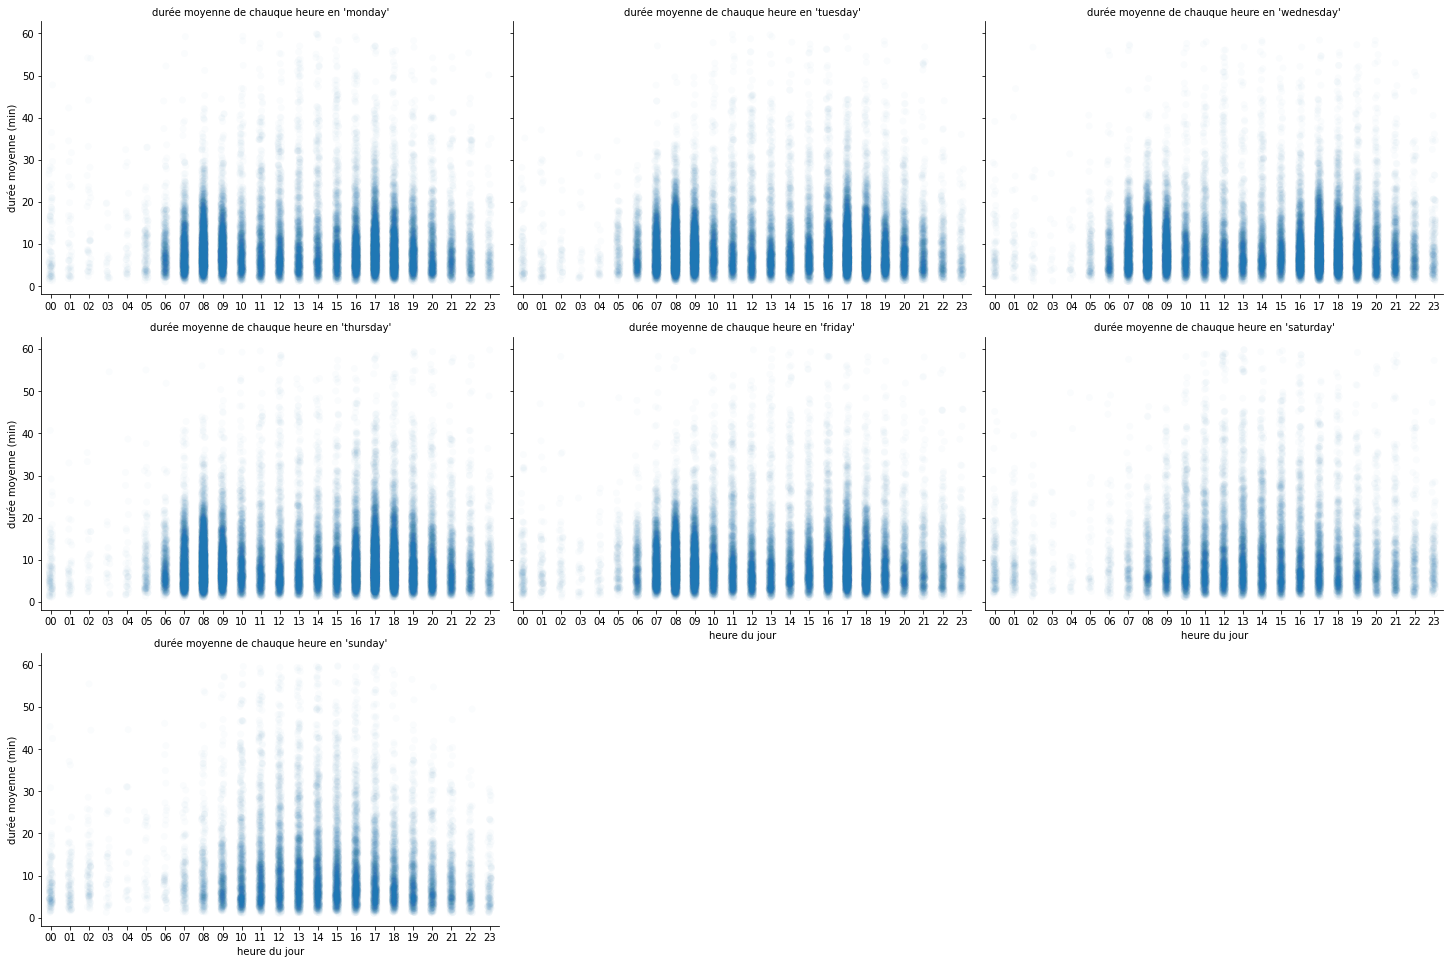

In [5]:
hours = []
for h in range(24):
    hours.append(str(h).zfill(2))
    
subdf2['day_time'] = subdf2['day_time'].astype('str').apply(lambda x: x.zfill(2))

g = sb.FacetGrid(data = subdf2, col = 'week_day', sharex=False, col_wrap = 3,
                 col_order=week_days, height=4.5, aspect=1.5)
g.map(sb.stripplot, 'day_time', 'duration_min', color = monocolor, alpha=1/50, size=7, order=hours)
g.set_titles(col_template="durée moyenne de chauque heure en '{col_name}'")
g.set_xlabels('heure du jour')
g.set_ylabels('durée moyenne (min)')
plt.show();

In [6]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1405091 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin